## **KMEANS CLUSTERING ON STORE DATA TO ANALYZE THE TREND IN MARKET SALES**

### **IMPORT PACKAGES AND READ DATA**

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')

#Set_default_setting_of_seaborn
sns.set()

In [5]:
raw = pd.read_excel('/content/cust_data.xlsx',index_col=0)


In [6]:
raw

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,M,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,M,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,M,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
raw.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


### **DATATYPES AND DIMENSIONS**

In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  27276 non-null  object
 1   Orders                  30000 non-null  int64 
 2   Jordan                  30000 non-null  int64 
 3   Gatorade                30000 non-null  int64 
 4   Samsung                 30000 non-null  int64 
 5   Asus                    30000 non-null  int64 
 6   Udis                    30000 non-null  int64 
 7   Mondelez International  30000 non-null  int64 
 8   Wrangler                30000 non-null  int64 
 9   Vans                    30000 non-null  int64 
 10  Fila                    30000 non-null  int64 
 11  Brooks                  30000 non-null  int64 
 12  H&M                     30000 non-null  int64 
 13  Dairy Queen             30000 non-null  int64 
 14  Fendi                   30000 non-null  int64 
 15  He

In [9]:
raw.shape

(30000, 37)

## **Distribution Of Variables**

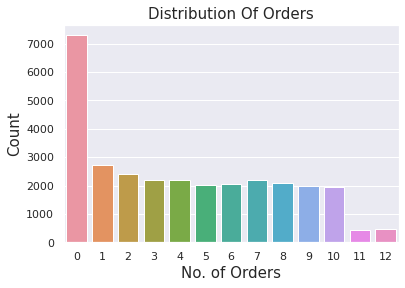

In [10]:
sns.countplot(data = raw, x='Orders')


plt.title('Distribution Of Orders', fontsize=15)
plt.xlabel('No. of Orders', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

**It can be seen that most of the customers have no past orders.**

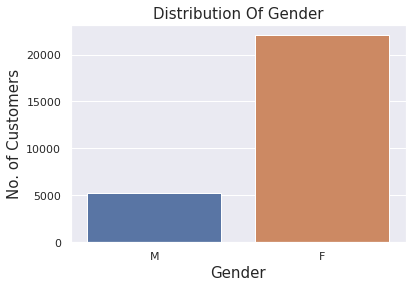

In [11]:
sns.countplot(data = raw, x='Gender')


plt.title('Distribution Of Gender', fontsize=15)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

plt.show()

**As we can see there are more female customers than male.**

### **STATISTICAL SUMMARY**

In [12]:
raw.describe()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,0.094267,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,0.531592,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,15.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


**We can see that the average order count is 4,with minimum zero orders and maximum of 12.**
**Also it can be seen that considered dataset is sparse as for all variables with brand searches,75% of the observations are 0.** 

In [13]:
raw.describe(include = object)

,Gender
count,27276
unique,2
top,F
freq,22054


**This summary contains information about the total number of observations,number of unique classes,the most dominant class and frequency of the same.**

### **MISSING DATA TREATMENT**

In [14]:
raw.isna().sum()

Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Hollister                    0
Forever 

In [15]:
#sorting based on null values
Total = raw.isnull().sum().sort_values(ascending=False)

#percentage of missing values
Percent = (raw.isnull().sum()/raw.isnull().count()*100).sort_values(ascending=False)

#create a dataframe using concat function
#'keys' is the list of columns
#'axis = 1' concats along the columns
missing_data = pd.concat([Total,Percent], axis=1, keys=['Total','Percent'])
missing_data

,Total,Percent
Gender,2724,9.08
J.M. Smucker,0,0.00
Juniper,0,0.00
Huawei,0,0.00
Compaq,0,0.00
IBM,0,0.00
Burberry,0,0.00
Mi,0,0.00
LG,0,0.00
Dior,0,0.00


**Only the Gender variable has around 9% of missing values.**

### **ENCODING**

***Since,this variable is categorical and has two variables 'M' and 'F'.And we have 2724 customers whose gender is unknown to us.So,we use dummy encoding for the variable.***

In [16]:
#create dummies against 'gender'
data = pd.get_dummies(raw,columns=['Gender'])

data.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,0,0


In [17]:
#Dimensions after encoding
data.shape

(30000, 38)

**'Gender_F' and 'Gender_M' are the two newly created variables that do not possess any missing value.'0' indicates the value for that customer is unknown.**

In [18]:
#Recheck
data.isnull().sum()

Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft                 0
Jiffy mix                 0
Kraft               

### **VISUALIZATION**

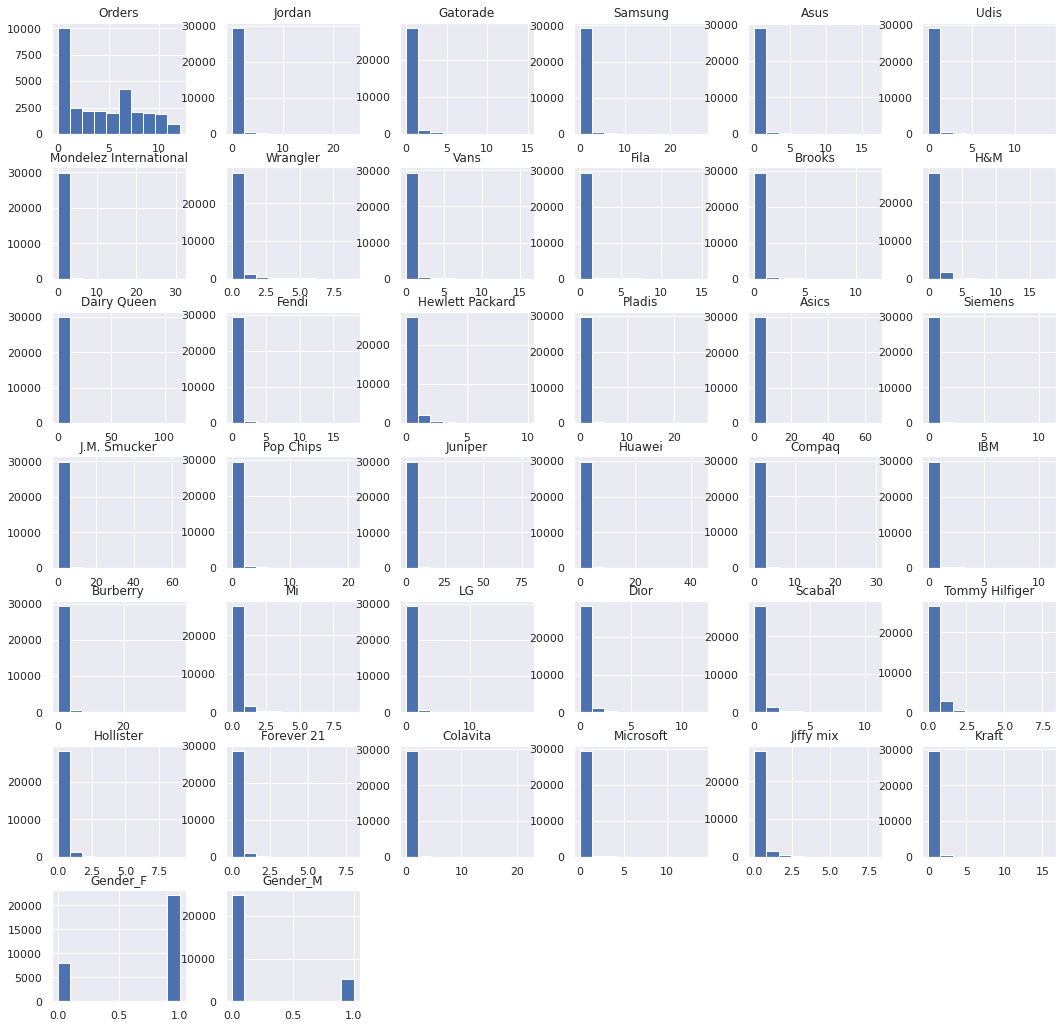

In [19]:
#PDF's of Features
fig = data.hist(figsize = (18,18))

### **K-MEANS CLUSTERING**

**PREPARE THE DATA**

**Feature scaling is used to transform all the variables in the same range.If not in same range,dominant values can effect the final result.**  

In [20]:
#'features' contain only the brand names
features = data.drop(['Orders','Gender_M','Gender_F'], axis=1)

features.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [21]:
#Scaling 
from sklearn.preprocessing import  StandardScaler

scale = StandardScaler().fit(features)

features = scale.transform(features)

### **BUILD A MODEL WITH MULTIPLE K**

**We will be using "Silhouette score" method.It is a method of interpretation and validation of consistency within clusters of data.**

**We don't know how many clusters give the most useful results.We will try values for "K" from 4 to 10 and then decide with the help of silhouette score.**

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#list for different values of K
n_clusters = [4,5,6,7,8,9,10]

#use of 'for' loop to build the clusters
#'random_state' returns the same sample each time you run the code
#fit and predict on the scaled data
for K in n_clusters :
  cluster = KMeans (n_clusters= K,random_state= 10)
  predict = cluster.fit_predict(features)

  score = silhouette_score(features,predict, random_state= 10)
  print("For n_clusters = {}, silhouette_score is {})".format(K,score))


For n_clusters = 4, silhouette_score is 0.28882936660509584)
For n_clusters = 5, silhouette_score is 0.27345077326442396)
For n_clusters = 6, silhouette_score is 0.21945733520582925)
For n_clusters = 7, silhouette_score is 0.20381188273491607)
For n_clusters = 8, silhouette_score is 0.19969011593382976)
For n_clusters = 9, silhouette_score is 0.19092447316758102)
For n_clusters = 10, silhouette_score is 0.2080202156754251)


**Therefore we will be taking optimum value of 'K' as 4.As Silhouette score corresponding to it is highest**

In [23]:
model = KMeans(n_clusters= 4, random_state= 10)

model.fit(features)

KMeans(n_clusters=4, random_state=10)

**Now,we will explore these 4 clusters to gain some insights about the clusters**

### **RETRIEVE THE CLUSTERS**

In [24]:
# 'model.labels_' can give the cluster number in which customer belongs.
data_output = data.copy(deep=True)
#Cluster column gives cluster number according to the observation
data_output['Cluster']= model.labels_

data_output.head()

,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,...,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Gender_F,Gender_M,Cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3,7,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [25]:
 #Check the size of each cluster
 np.unique(model.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([ 1255, 22772,  5272,   701]))

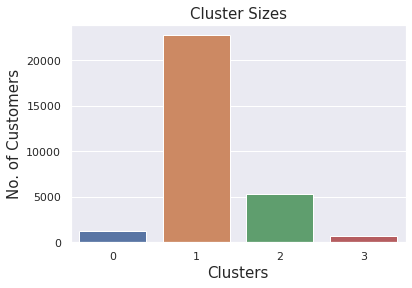

In [26]:
sns.countplot(data=data_output, x= "Cluster")

plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Customers', fontsize = 15)

plt.show()

## **CLUSTER CENTERS**

In [27]:
#They give information about the variables belonging to the clusters
#It will give co-ordinates of a cluster center
centers = pd.DataFrame(model.cluster_centers_, columns= data_output.columns[1:36])

In [28]:
centers.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.446911,0.464653,0.233811,0.158847,0.102969,0.253960,0.317851,0.385554,0.095476,0.808415,...,1.396351,0.631866,0.290554,1.137030,0.335733,0.417016,1.391345,0.806428,1.575620,1.922702
1,-0.158476,-0.157536,-0.084381,-0.116934,-0.121153,-0.087155,-0.113422,-0.076786,-0.039016,-0.123452,...,-0.088160,-0.161581,-0.191656,-0.142253,-0.148547,-0.141765,-0.076493,-0.068999,-0.079321,-0.082740
2,0.594856,0.569990,0.324250,0.474459,0.511302,0.314878,0.430609,0.257115,0.145073,0.358618,...,0.061868,0.565501,0.770176,0.350728,0.586942,0.535840,0.003689,0.104907,-0.020615,-0.087260
3,-0.116054,0.008321,-0.110823,-0.046447,-0.085908,0.013628,-0.116023,-0.125255,0.007833,-0.127840,...,-0.099359,-0.125881,-0.074137,-0.045926,-0.180266,-0.162539,-0.032771,0.010947,-0.088290,-0.098193


**Now,we will extract the variables in each of the clusters and try to name each of cluster based on the variables(brands).**

## **CLUSTER ANALYSIS**


### ***ANALYSIS OF CLUSTER_1(0)***


In [41]:
#sort the variables based on cluster centers
cluster_1 = sorted(zip(list(centers.iloc[0,:]), list(centers.columns)), reverse = True)[:20]

In [30]:
np.unique(model.labels_, return_counts=True)[1][0]

1255

In [43]:
#Sort the variables belonging to this cluster
#Top 20 variables
cluster1_var = pd.DataFrame(cluster_1)[1]
cluster1_var

0                     Pladis
1                   Burberry
2                      Kraft
3                Dairy Queen
4                  Jiffy mix
5                         LG
6                   Colavita
7                  Pop Chips
8               J.M. Smucker
9             Tommy Hilfiger
10                    Brooks
11                 Microsoft
12                      Dior
13                       H&M
14                     Fendi
15                  Gatorade
16                        Mi
17                    Jordan
18                Forever 21
19                      Vans
20                     Asics
21                   Juniper
22                 Hollister
23                  Wrangler
24                    Scabal
25    Mondelez International
26                   Samsung
27           Hewlett Packard
28                      Asus
29                    Huawei
Name: 1, dtype: object

In [32]:
#summary for observations in the cluster
data_output[['Orders','Gender_F','Gender_M','Cluster']][data_output.Cluster == 0].describe()

,Orders,Gender_F,Gender_M,Cluster
count,1255.000000,1255.000000,1255.000000,1255.0
mean,4.146614,0.821514,0.120319,0.0
std,3.630131,0.383074,0.325464,0.0
min,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,0.0
50%,4.000000,1.000000,0.000000,0.0
75%,7.000000,1.000000,0.000000,0.0
max,12.000000,1.000000,1.000000,0.0


**Most of the customers belonging in this cluster have searched for electronics,apparels as well as grocery brands like LG,APPLE,PRADA,REEBOK,VANS,DAIRY QUEEN,BERTOLLI, and so on.**
**Let's denote it as 'BASKET CLASS'.**

### ***ANALYSIS OF CLUSTER_2(1)***

In [37]:
#sort the variables based on cluster centers
cluster_2 = sorted(zip(list(centers.iloc[1,:]), list(centers.columns)), reverse = True)[:20]

In [34]:
np.unique(model.labels_, return_counts=True)[1][1]

22772

In [38]:
#Sort the variables belonging to this cluster
#Top 20 variables
cluster2_var = pd.DataFrame(cluster_2)[1]
cluster2_var

0                        IBM
1                       Fila
2            Hewlett Packard
3                     Compaq
4                      Fendi
5                  Microsoft
6                   Colavita
7                       Vans
8                  Jiffy mix
9                      Kraft
10                   Samsung
11    Mondelez International
12                   Juniper
13                        LG
14               Dairy Queen
15                        Mi
16                 Pop Chips
17              J.M. Smucker
18                  Wrangler
19                   Siemens
Name: 1, dtype: object

In [36]:
#summary for observations in the cluster
data_output[['Orders','Gender_F','Gender_M','Cluster']][data_output.Cluster == 1].describe()

,Orders,Gender_F,Gender_M,Cluster
count,22772.000000,22772.000000,22772.000000,22772.0
mean,4.096829,0.705691,0.195547,1.0
std,3.606516,0.455741,0.396630,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.0
50%,4.000000,1.000000,0.000000,1.0
75%,7.000000,1.000000,0.000000,1.0
max,12.000000,1.000000,1.000000,1.0


**Most of the customers belonging in this cluster have searched for electronics brands like SAMSUNG,SIEMENS,COMPAQ,ONE PLUS,MI and so on. Let's denote it as 'ELECTRONICS'.**


### ***ANALYSIS OF CLUSTER_3(2)***

In [52]:
#sort the variables based on cluster centers
cluster_3 = sorted(zip(list(centers.iloc[2,:]), list(centers.columns)), reverse = True)[:20]

In [45]:
np.unique(model.labels_, return_counts=True)[1][2]

5272

In [53]:
#Sort the variables belonging to this cluster
#Top 20 variables
cluster3_var = pd.DataFrame(cluster_3)[1]
cluster3_var

0                     Scabal
1                     Jordan
2                  Hollister
3                   Gatorade
4                       Dior
5                        H&M
6                 Forever 21
7                       Udis
8                     Huawei
9                       Asus
10                  Wrangler
11                    Brooks
12            Tommy Hilfiger
13                   Samsung
14    Mondelez International
15                        Mi
16                   Juniper
17                      Vans
18                    Compaq
19                  Burberry
Name: 1, dtype: object

In [51]:
#summary for observations in the cluster
data_output[['Orders','Gender_F','Gender_M','Cluster']][data_output.Cluster == 2].describe()

,Orders,Gender_F,Gender_M,Cluster
count,5272.000000,5272.000000,5272.000000,5272.0
mean,4.459598,0.845220,0.089340,2.0
std,3.503566,0.361729,0.285261,0.0
min,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,2.0
50%,4.000000,1.000000,0.000000,2.0
75%,7.000000,1.000000,0.000000,2.0
max,12.000000,1.000000,1.000000,2.0


**Most of the customers belonging in this cluster have searched for Grocery brands like NESTLE,DAIRY QUEEN,JIFFY MIX,PILLSBURY and so on.Let's denote it as 'GROCERY'.**

### ***ANALYSIS OF CLUSTER_4(3)***

In [54]:
#sort the variables based on cluster centers
cluster_4 = sorted(zip(list(centers.iloc[3,:]), list(centers.columns)), reverse = True)[:20]

In [ ]:
np.unique(model.labels_, return_counts=True)[1][3]

701

In [55]:
#Sort the variables belonging to this cluster
#Top 20 variables
cluster4_var = pd.DataFrame(cluster_4)[1]
cluster4_var

0                    Siemens
1                      Asics
2               J.M. Smucker
3                  Pop Chips
4                    Juniper
5                     Huawei
6                         Mi
7                     Compaq
8     Mondelez International
9                  Microsoft
10                  Gatorade
11                      Fila
12                       IBM
13                     Fendi
14                  Colavita
15                       H&M
16            Tommy Hilfiger
17                      Asus
18                    Scabal
19               Dairy Queen
Name: 1, dtype: object

In [56]:
#summary for observations in the cluster
data_output[['Orders','Gender_F','Gender_M','Cluster']][data_output.Cluster == 3].describe()

,Orders,Gender_F,Gender_M,Cluster
count,701.000000,701.000000,701.000000,701.0
mean,4.402282,0.708987,0.209700,3.0
std,3.522693,0.454554,0.407385,0.0
min,0.000000,0.000000,0.000000,3.0
25%,1.000000,0.000000,0.000000,3.0
50%,4.000000,1.000000,0.000000,3.0
75%,7.000000,1.000000,0.000000,3.0
max,12.000000,1.000000,1.000000,3.0


**Most of the customers belonging in this cluster have searched for apparels  brands like SCABAL,JORDAN,DIOR,FILA,H&M and so on. Let's denote it as 'APPARELS'.**

### **CONCLUSION**

**After applying the K-Means Clustering algorithm with an optimized number of clusters,we get an information about interest of the customers in the different brands.This type of segmentation can help e-commerce companies,to know the customer choices and they can provide more accurate recommendations to the customers.**